# Entendimento do Negócio

Em um ambiente econômico cada vez mais dinâmico, a capacidade de prever a renda individual torna-se crucial para uma variedade de aplicações práticas, desde a avaliação de crédito até o planejamento financeiro pessoal. Empresas e instituições financeiras enfrentam o desafio de entender os fatores que influenciam a renda para tomar decisões informadas sobre empréstimos, investimentos e serviços personalizados. Além disso, a análise detalhada da renda pode ajudar no desenvolvimento de políticas públicas voltadas para a redução de desigualdades e promoção do bem-estar socioeconômico. O objetivo central deste projeto é construir um modelo que possa estimar com precisão a renda de indivíduos a partir de dados demográficos e socioeconômicos, proporcionando insights valiosos para decisões estratégicas em diversos setores.


# Discussão Sobre os Dados Disponíveis

* Foi apresentado e discutido o conjunto de dados a ser utilizado no projeto, que inclui as seguintes variáveis (em dicionário de dados)

* Foi destacada a importância de uma análise exploratória detalhada para entender as distribuições, possíveis correlações e a necessidade de tratamento de dados, incluindo a manipulação de valores ausentes e outliers.


# Dicionário de Dados

| Feature                | Descrição                                                     |
|------------------------|---------------------------------------------------------------|
| `Unnamed: 0`           | Índice das linhas (coluna redundate, será removida) |
| `data_ref`             | Data de referência dos dados                                  |
| `id_cliente`           | Identificador único do cliente                                |
| `sexo`                 | Sexo do cliente (F para feminino, M para masculino)           |
| `posse_de_veiculo`     | Indica se o cliente possui veículo (True para sim, False para não) |
| `posse_de_imovel`      | Indica se o cliente possui imóvel (True para sim, False para não) |
| `qtd_filhos`           | Quantidade de filhos do cliente                               |
| `tipo_renda`           | Tipo de renda do cliente (ex: Empresário, Assalariado, Servidor público) |
| `educacao`             | Nível de educação do cliente (ex: Secundário, Superior completo) |
| `estado_civil`         | Estado civil do cliente (ex: Solteiro, Casado)                |
| `tipo_residencia`      | Tipo de residência do cliente (ex: Casa, Governamental)        |
| `idade`                | Idade do cliente em anos                                      |
| `tempo_emprego`        | Tempo de emprego do cliente em anos                           |
| `qt_pessoas_residencia`| Quantidade de pessoas na residência do cliente                |
| `renda`                | Renda do cliente                                              |


# Decisões Preliminares e Próximos Passos

* Análise Exploratória dos Dados (AED): Será a primeira etapa executada, com o objetivo de mapear a qualidade dos dados e entender melhor suas características.
* Tratamento de Dados: Decisão de aplicar técnicas para lidar com valores ausentes e outliers, com o intuito de preparar um conjunto de dados limpo para modelagem.
* Seleção de Modelos: Foi acordado que inicialmente serão explorados modelos de Regressão Linear, Regressão de Ridge e K-Nearest Neighbors (KNN).
* Avaliação de Modelos: Os modelos serão avaliados com base em métricas como MSE e R² para determinar sua precisão e capacidade de generalização.

In [1]:
!pip install ydata_profiling

In [2]:
#Importando as bibliotecas
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Atribuindo o arquivo csv à variável df como um DataFrame
df = pd.read_csv('previsao_de_renda.csv', index_col=0)

In [4]:
report = ProfileReport(df, title="analises_preliminares_ydata")
report.to_file("analises_preliminares.html")

C:\Users\giova\anaconda3\lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
#informações das features e seus tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   id_cliente             15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

In [6]:
#Analisando a estrutura do DF
df.shape

(15000, 14)

In [7]:
#Verificando as linhas duplicadas
df.duplicated().sum()

407

In [8]:
#Exluindo as linhas duplicadas
df = df.drop_duplicates()
df.duplicated().sum()

0

In [9]:
#Excluindo colunas irrelevantes
df = df.drop(columns=['id_cliente', 'sexo'])

Consideramos a variável id_cliente como irrelevante porque ela não oferece significância preditiva. Já A variável 'sexo' pode inputar um viés preconceituoso às nossas análises.

In [10]:
#Checando novamente se existem valores nulos
df.duplicated().sum()

0

In [11]:
#Conferindo se a estrutura se mantem após as modificações
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14593 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               14593 non-null  object 
 1   posse_de_veiculo       14593 non-null  bool   
 2   posse_de_imovel        14593 non-null  bool   
 3   qtd_filhos             14593 non-null  int64  
 4   tipo_renda             14593 non-null  object 
 5   educacao               14593 non-null  object 
 6   estado_civil           14593 non-null  object 
 7   tipo_residencia        14593 non-null  object 
 8   idade                  14593 non-null  int64  
 9   tempo_emprego          12090 non-null  float64
 10  qt_pessoas_residencia  14593 non-null  float64
 11  renda                  14593 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.3+ MB


**Agora, iremos verificar a coluna 'data_ref' agrupando-a por 'renda'. Nosso intuíto é identificar através de uma série temporal se 'data_ref' pode ou não ter significância explicativa.**

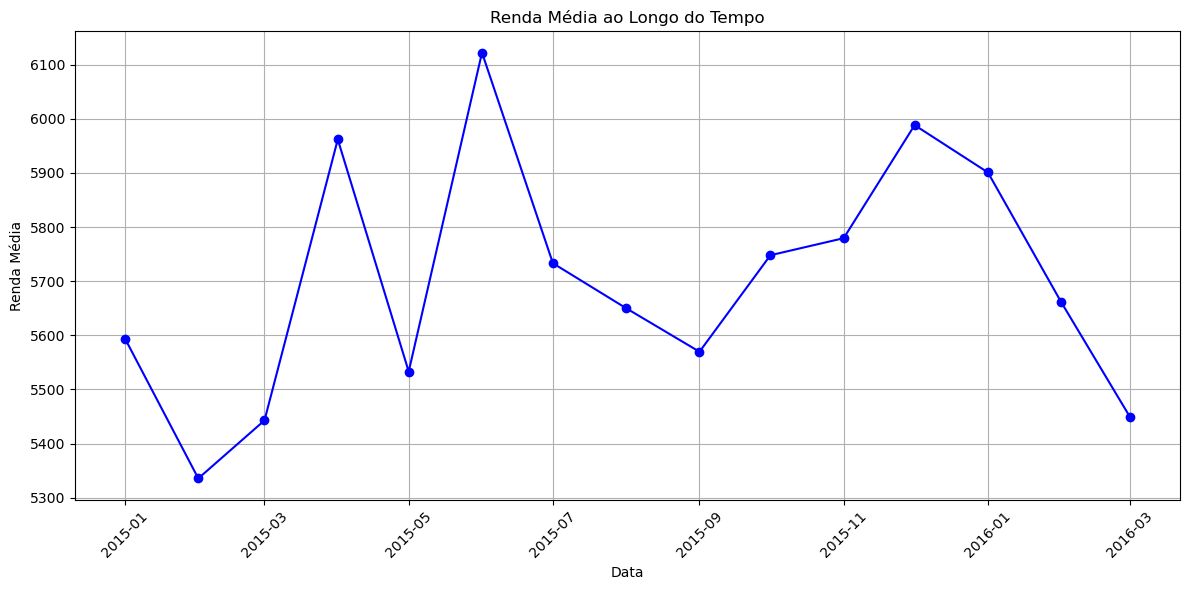

In [12]:
import matplotlib.pyplot as plt

# Convertendo 'data_ref' para datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Agrupando os dados pela data e calculando a renda média
renda_media_por_data = df.groupby('data_ref')['renda'].mean().reset_index()

# Plotando a renda média ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(renda_media_por_data['data_ref'], renda_media_por_data['renda'], marker='o', linestyle='-', color='blue')
plt.title('Renda Média ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Renda Média')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  
plt.show()


**Com base no resultado da plotagem acima, observamos que no período de um pouco mais que um ano houve alguns indicadores na distribuição média da renda. Porém, dado que não temos acesso a recursos externos que poderiam explicar essas variações, podemos considerar que essa variável pode não ser útil para rodar junto aos nossos futuros modelos de ML.**

In [13]:
df = df.drop(columns=['data_ref'])

In [14]:
df.isnull().sum()

posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2503
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [15]:
#Checando linhas duplicadas
df.duplicated().sum()

4146

**Obs:** Podemos notar que após a exclusão da variável 'data_ref', uma quantidade substancial de dados duplicados (4146 ou 1/3 do dataset) apareceu. Embora para que entendessemos melhor essa diferença um contato mais próximo com os conhecedores do negócio seria necessário, a grande quantidade de duplicados após a exclusão de data_ref leva-nos a crer que essa variável continha erros de inclusão de usuários, e estava colaborando para criar falsos identificadores únicos através de entradas em datas diferentes.

In [16]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [17]:
df['tempo_emprego'].describe()

count    8655.000000
mean        7.795977
std         6.740480
min         0.117808
25%         3.046575
50%         6.052055
75%        10.268493
max        42.906849
Name: tempo_emprego, dtype: float64

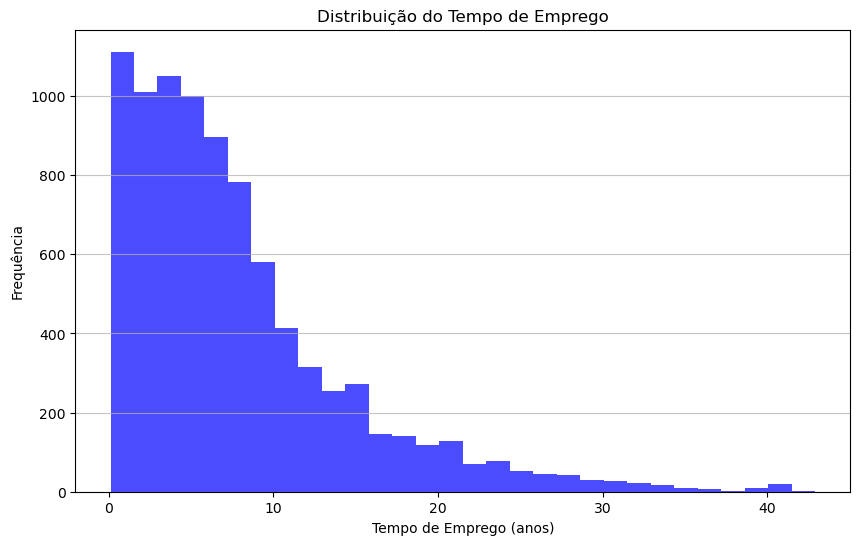

In [18]:
tempo_emprego = df['tempo_emprego']

plt.figure(figsize=(10, 6))
plt.hist(tempo_emprego, bins=30, alpha=0.7, color='blue')
plt.title('Distribuição do Tempo de Emprego')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)

plt.show()

**Distribuição dos Dados:** Em nossas análises preliminares, observamos que a variável **tempo_emprego** possuia 2503 dados ausesntes. As estatísticas descritivas nos apresentaram valores entre 0.12 a 42.91 anos, com uma média de aproximadamente 7.72 anos e um desvio padrão de cerca de 6.71 anos. Isso indica que a distribuição tem uma variação considerável, mas a média não é tão distante dos valores reais esperados para tempo de emprego, sugerindo que não possuímos outliers devido a erros de digitação. Sendo assim, a imputação de dados ausentes pela média não deve distorcer a distribuição geral dos dados.

In [19]:
df['tempo_emprego'] = df['tempo_emprego'].fillna(df['tempo_emprego'].mean())

In [20]:
df.isnull().sum()

posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10447 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   posse_de_veiculo       10447 non-null  bool   
 1   posse_de_imovel        10447 non-null  bool   
 2   qtd_filhos             10447 non-null  int64  
 3   tipo_renda             10447 non-null  object 
 4   educacao               10447 non-null  object 
 5   estado_civil           10447 non-null  object 
 6   tipo_residencia        10447 non-null  object 
 7   idade                  10447 non-null  int64  
 8   tempo_emprego          10447 non-null  float64
 9   qt_pessoas_residencia  10447 non-null  float64
 10  renda                  10447 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(4)
memory usage: 836.6+ KB


In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(10447, 11)

In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qtd_filhos,10447.0,0.434287,0.752724,0.000000,0.000000,0.000000,1.000000,14.000000
idade,10447.0,43.920934,11.249161,22.000000,34.000000,43.000000,53.000000,68.000000
tempo_emprego,10447.0,7.795977,6.135137,0.117808,3.682192,7.539726,9.052055,42.906849
qt_pessoas_residencia,10447.0,2.208098,0.913950,1.000000,2.000000,2.000000,3.000000,15.000000
renda,10447.0,5697.840604,8415.826368,118.710000,2016.855000,3512.680000,6383.595000,245141.670000


**Nas próximas células, utilizaremos boxplots para visualizarmos a distribuição das nossas variáveis numéricas:**

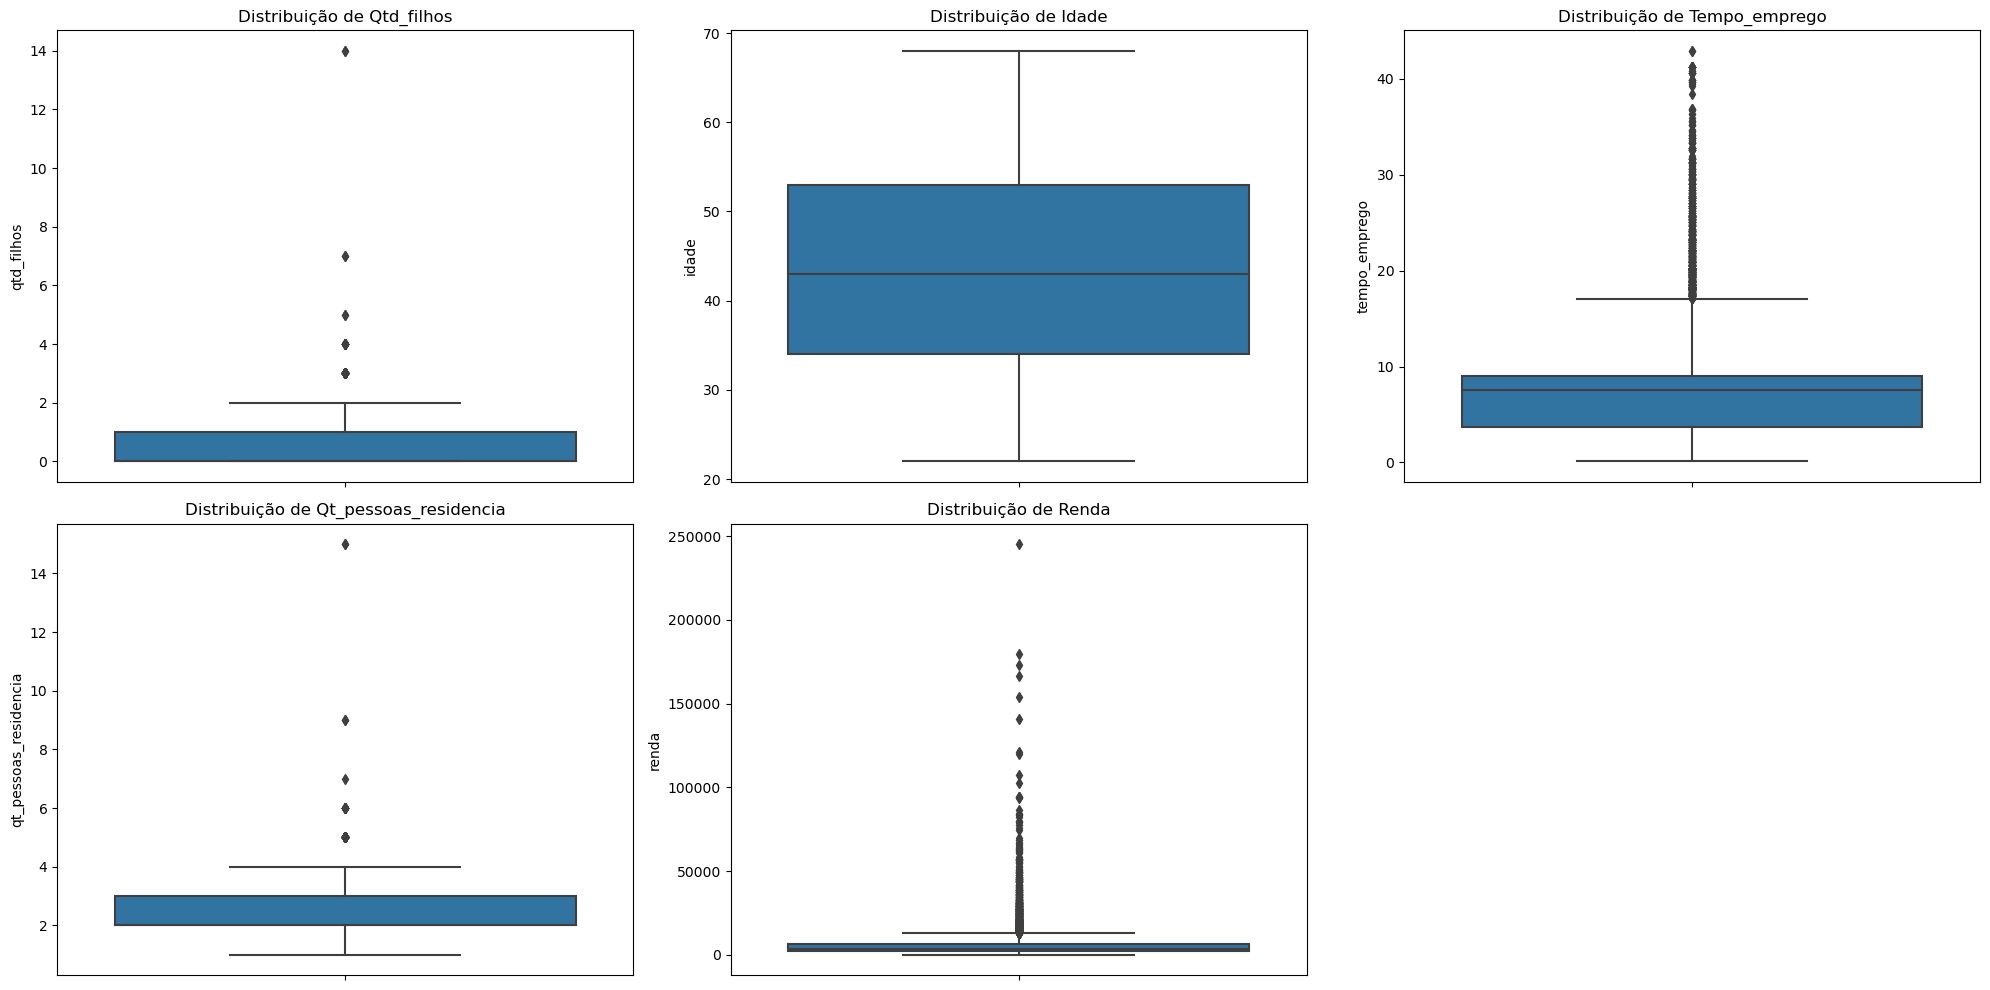

In [25]:
plt.figure(figsize=(20, 10))

# Qtd_filhos
plt.subplot(2, 3, 1)
sns.boxplot(y=df['qtd_filhos'])
plt.title('Distribuição de Qtd_filhos')

# Idade
plt.subplot(2, 3, 2)
sns.boxplot(y=df['idade'])
plt.title('Distribuição de Idade')

# Tempo_emprego
plt.subplot(2, 3, 3)
sns.boxplot(y=df['tempo_emprego'])
plt.title('Distribuição de Tempo_emprego')

# Qt_pessoas_residencia
plt.subplot(2, 3, 4)
sns.boxplot(y=df['qt_pessoas_residencia'])
plt.title('Distribuição de Qt_pessoas_residencia')

# Renda
plt.subplot(2, 3, 5)
sns.boxplot(y=df['renda'])
plt.title('Distribuição de Renda')

plt.tight_layout()
plt.show()


**Obs:** Com base nos resultados acima, com exceção à variável 'idade', observamos outliers consideráveis em todas as demais variáveis  numéricas. Uma vez que estamos lidando com fatores que refletem complexidades socioeconomicas, talvez essas diferenças representem valores reais. Por outro lado, para que nossos modelos tenham uma boa perfirmance, devemos tratar os outliers para obtermos resultados menos enviesados.

Além disso, com base nas estatísticas descritivas anteriores, observamos que o nosso target 'renda' possui a maior variância entre todas as demais. Iremos tentar descobrir se existem correlações que justifiquem valores máximos tão expressivos através de um mapa de correlação, para isso, teremos que ter acesso a todas às variáveis e seus impactos sobre a renda. Desta forma, utilizaremos o One-Hot-Encoding e, em seguinda, criaremos um mapa de calor:

In [26]:
#Aplicando One-Hot Encoding às variáveis categóricas
df_encoded = pd.get_dummies(df, columns=['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

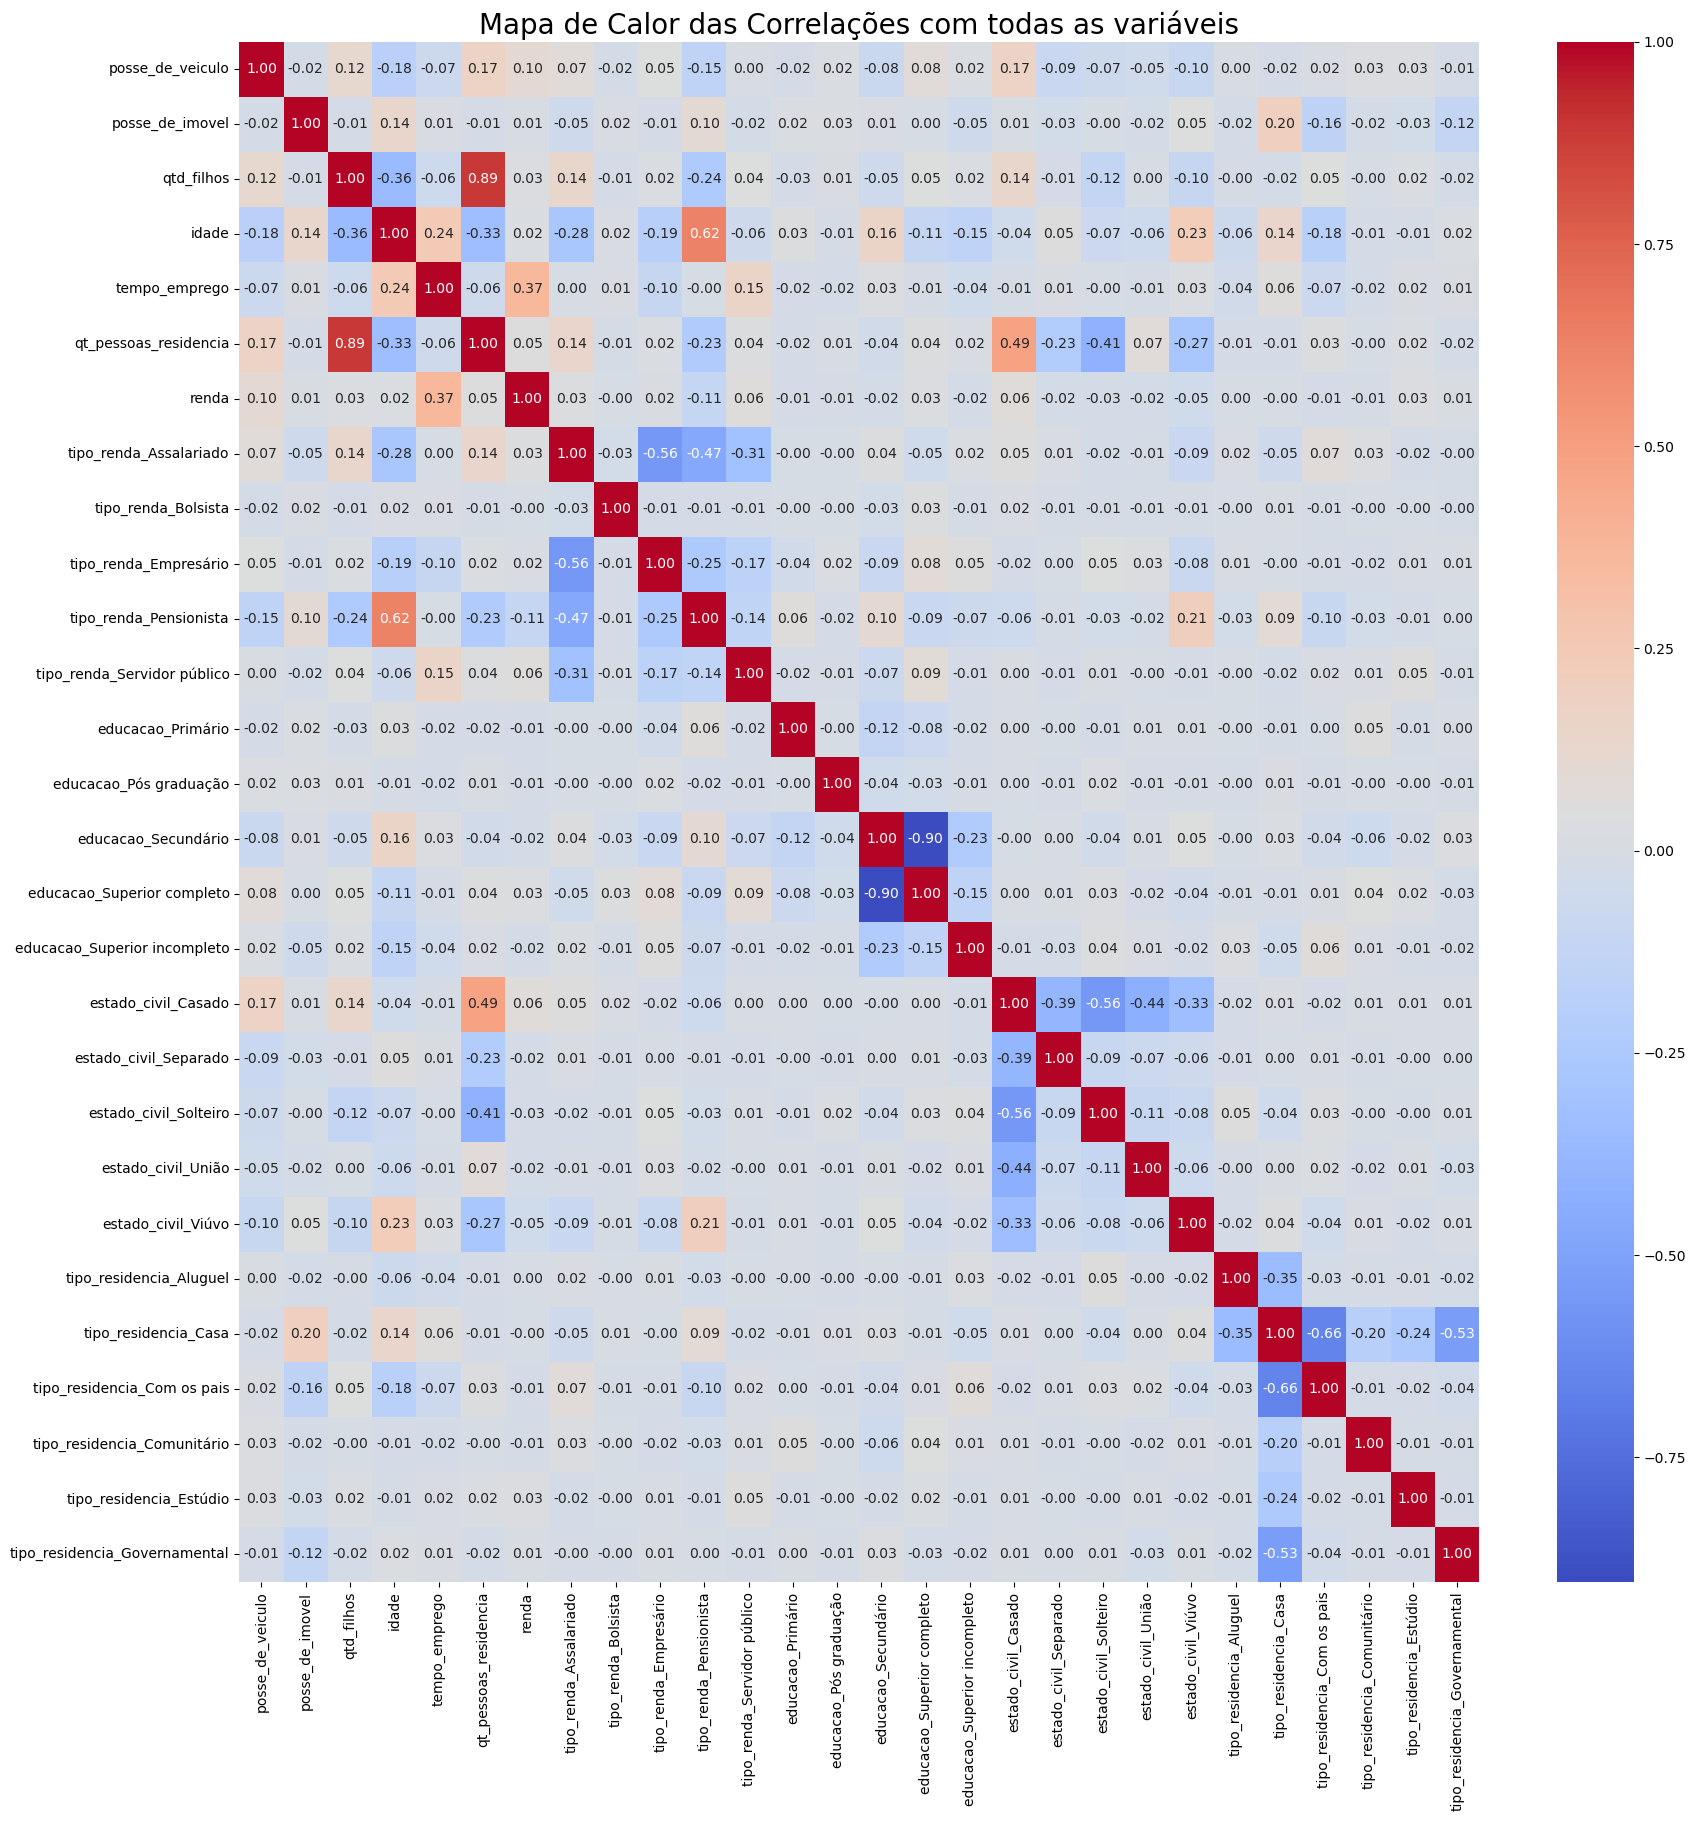

In [27]:
corr_matrix = df_encoded.corr()

#Tamanho da figura
plt.figure(figsize=(20, 20))  

# Criando o mapa de calor
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Ajustando o tamanho da fonte dos rótulos 
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  

# Ajustando o título com um tamanho de fonte maior
plt.title('Mapa de Calor das Correlações com todas as variáveis', fontsize=20)

plt.show()

**Conclusão:** Com base nas observações acima, concluímos que a feature tempo_emprego é a única que possui uma correlação positiva moderada (0.37) com o target 'renda', isso não quer dizer que seja a única importante, porém, observamos que não há nada de excepcional que poderia explicar valores máximos em renda tão expressivos. Desta forma, como nosso objetivo é um modelo mais generalizável, aparentemente faz sentido tratar os outliers em nosso target 'renda'.

Para o tratamento dos outliers utilizaremos limites inferiores e superiores com base no IQR com capagem de dados (clipping). Após testes, a linha de corte mais adequada foi de - ou + 1.5 * IQR. Com o intuíto de não poluir nosso notebook, manteremos apenas a última escolha conforme podemos observar abaixo:

In [28]:
# Selecionando colunas numéricas
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns


# Dicionário para armazenar os limites inferiores e superiores de cada coluna numérica
outliers_limits = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculando limites inferiores e superiores
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Armazenando os limites
    outliers_limits[col] = (lower_limit, upper_limit)

print(outliers_limits)

{'qtd_filhos': (-1.5, 2.5), 'idade': (5.5, 81.5), 'tempo_emprego': (-4.372602739726025, 17.10684931506849), 'qt_pessoas_residencia': (0.5, 4.5), 'renda': (-4533.254999999999, 12933.705)}


In [29]:
# Aplicando capagem com os limites calculados
for col, (lower_limit, upper_limit) in outliers_limits.items():
    df_encoded[col] = df_encoded[col].clip(lower=lower_limit, upper=upper_limit)


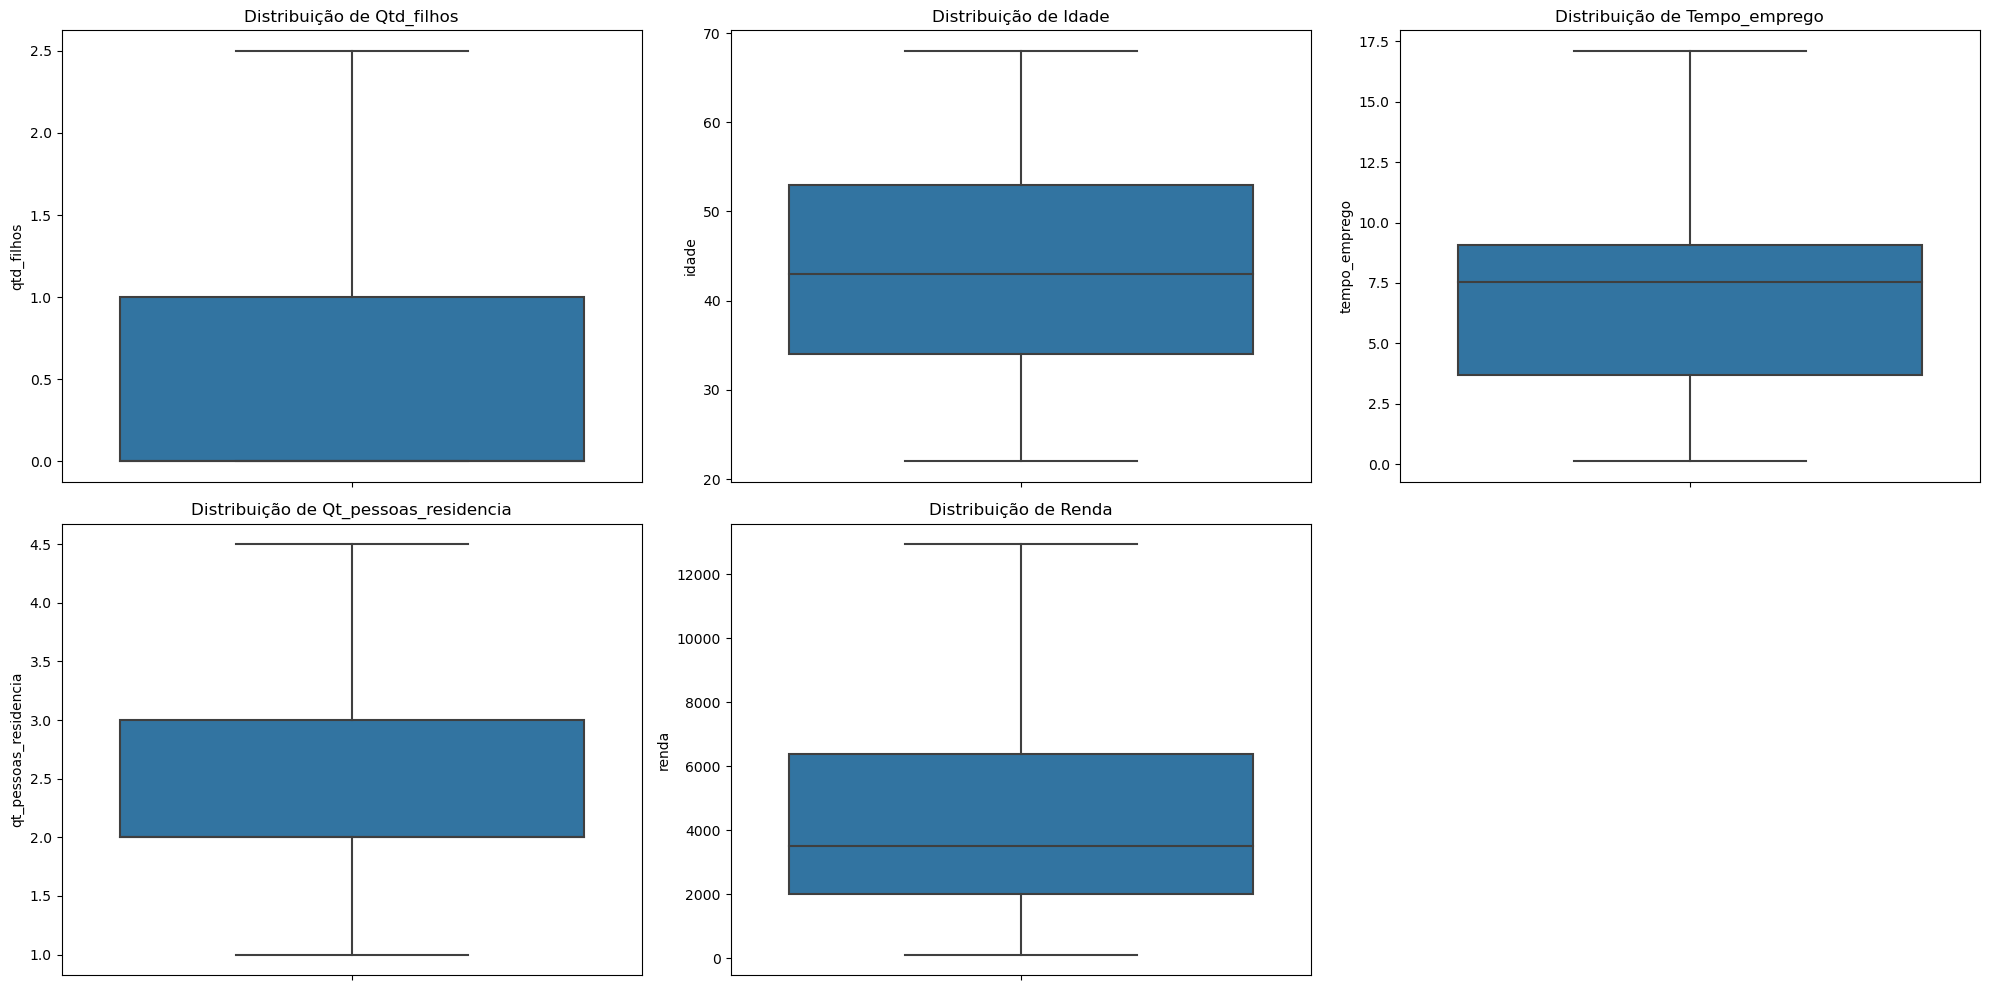

In [30]:
#Plotando novamente os boxplots
plt.figure(figsize=(20, 10))

# Qtd_filhos
plt.subplot(2, 3, 1)
sns.boxplot(y=df_encoded['qtd_filhos'])
plt.title('Distribuição de Qtd_filhos')

# Idade
plt.subplot(2, 3, 2)
sns.boxplot(y=df_encoded['idade'])
plt.title('Distribuição de Idade')

# Tempo_emprego
plt.subplot(2, 3, 3)
sns.boxplot(y=df_encoded['tempo_emprego'])
plt.title('Distribuição de Tempo_emprego')

# Qt_pessoas_residencia
plt.subplot(2, 3, 4)
sns.boxplot(y=df_encoded['qt_pessoas_residencia'])
plt.title('Distribuição de Qt_pessoas_residencia')

# Renda
plt.subplot(2, 3, 5)
sns.boxplot(y=df_encoded['renda'])
plt.title('Distribuição de Renda')

plt.tight_layout()
plt.show()

In [37]:
df_encoded.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qtd_filhos,10447.0,0.422753,0.694654,0.000000,0.000000,0.000000,1.000000,2.500000
idade,10447.0,43.920934,11.249161,22.000000,34.000000,43.000000,53.000000,68.000000
tempo_emprego,10447.0,7.275194,4.656730,0.117808,3.682192,7.539726,9.052055,17.106849
qt_pessoas_residencia,10447.0,2.197090,0.867858,1.000000,2.000000,2.000000,3.000000,4.500000
renda,10447.0,4733.108133,3602.636747,118.710000,2016.855000,3512.680000,6383.595000,12933.705000
tipo_renda_Assalariado,10447.0,0.513449,0.499843,0.000000,0.000000,1.000000,1.000000,1.000000
tipo_renda_Bolsista,10447.0,0.000670,0.025878,0.000000,0.000000,0.000000,0.000000,1.000000
tipo_renda_Empresário,10447.0,0.229540,0.420557,0.000000,0.000000,0.000000,0.000000,1.000000
tipo_renda_Pensionista,10447.0,0.172011,0.377408,0.000000,0.000000,0.000000,0.000000,1.000000
tipo_renda_Servidor público,10447.0,0.084330,0.277896,0.000000,0.000000,0.000000,0.000000,1.000000


In [43]:
# Atribuindo variáveis independentes e dependentes
X = df_encoded.drop('renda', axis=1)
y= df_encoded['renda']

# Fazendo a divisão em 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**Regressão Linear sem Standard Scaler**

In [45]:
#RL sem Standard Scaler
#Treinando o modelo de RL
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

#Predição no conjunto de teste
y_pred = linear_reg.predict(X_test)

#Avaliação do modelo de RL
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

print(f'Regressão Linear MSE: {mse_linear}')
print(f'Regressão Linear R²: {r2_linear}')

Regressão Linear MSE: 10988123.928033948
Regressão Linear R²: 0.1705634969104114


**Obs:** Embora nosso conjunto possua algumas curvas mais ou menos simétricas, os outliers foram tratados. 

**Abaixo, utilizaremos a transformação Standard Scaler no conjunto de treino**

In [46]:
# Atribuindo variáveis independentes e dependentes
X = df_encoded.drop('renda', axis=1)
y= df_encoded['renda']

# Fazendo a divisão em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Instanciando o StandardScaler
scaler = StandardScaler()

# Aplicando o StandardScaler aos dados de treino e teste separadamente para evitar vazamento de dados
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Modelo:** Regressão Linear

In [47]:
#Treinando o modelo de RL
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

#Predição no conjunto de teste
y_pred_linear = linear_reg.predict(X_test_scaled)

#Avaliação do modelo de RL
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Regressão Linear MSE: {mse_linear}')
print(f'Regressão Linear R²: {r2_linear}')

Regressão Linear MSE: 11165618.623572733
Regressão Linear R²: 0.17625918050148437


**Modelo**: Regressão Ridge

In [48]:
# Treinando o modelo de Regressão de Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)

# Predição no conjunto de teste
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Avaliação do modelo de Regressão de Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Regressão de Ridge MSE: {mse_ridge}")
print(f"Regressão de Ridge R²: {r2_ridge}")


Regressão de Ridge MSE: 11116549.748199642
Regressão de Ridge R²: 0.17987922494097175


**Modelo:** KNeighbors Regressor

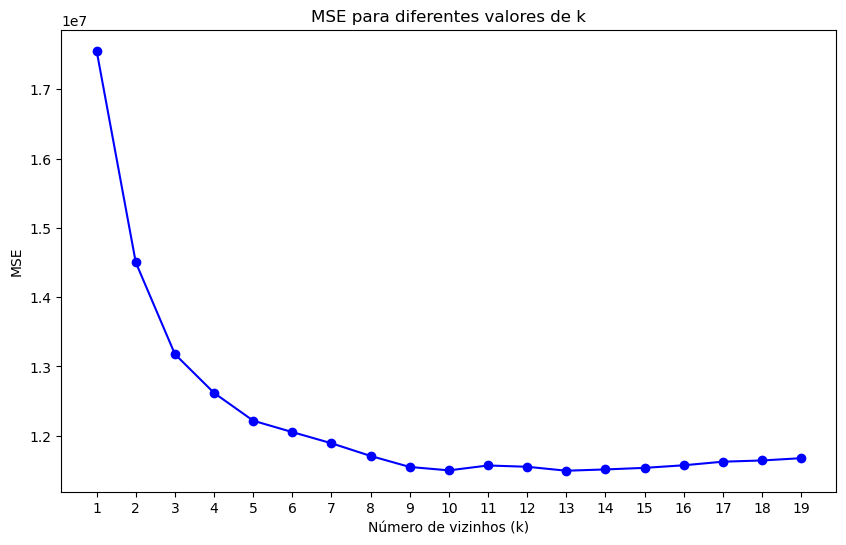

O valor ótimo de k é: 13


In [49]:
#Encontrando o melhor K para o KNN

k_values = range(1, 20)
mse_scores = []

#Calculando o MSE para cada valor de K
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
#Plotando o resultado
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_scores, marker='o', linestyle='-', color='blue')
plt.title('MSE para diferentes valores de k')
plt.xlabel('Número de vizinhos (k)')
plt.ylabel('MSE')
plt.xticks(k_values)
plt.show()

#ENcontrando o K com o melhor MSE
k_otimo = k_values[mse_scores.index(min(mse_scores))]
print(f'O valor ótimo de k é: {k_otimo}')

**Aplicando o modelo com k=13**

In [50]:
# Treinando o modelo KNN
knn_reg = KNeighborsRegressor(n_neighbors=13)
knn_reg.fit(X_train_scaled, y_train)

# Predição no conjunto de teste
y_pred_knn = knn_reg.predict(X_test_scaled)

# Avaliação do modelo KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN MSE: {mse_knn}")
print(f"KNN R²: {r2_knn}")

KNN MSE: 11495876.322030608
KNN R²: 0.15189449849461012


**Considerações finais:** 

As métricas fornecidas para os três modelos de regressão sugerem que cada modelo possui limitações quanto à sua capacidade de prever a renda com precisão, conforme refletido pelo Erro Quadrático Médio (MSE) e pelo coeficiente de determinação (R²).

**Regressão Linear:**

MSE: 11,165,618.62
R²: 0.1763
A regressão linear apresentou um R² de 0.1763, o que implica que apenas cerca de 17.63% da variância na variável de renda pode ser explicada pelo modelo. Isso sugere que o modelo linear pode não estar capturando todas as complexidades dos dados ou que existem outras variáveis e relações não lineares que precisam ser consideradas.

**Regressão Ridge:**

MSE: 11,116,549.75
R²: 0.1799
A regressão de Ridge, uma forma regularizada de regressão linear que busca reduzir a complexidade do modelo e evitar o sobreajuste, obteve um resultado ligeiramente melhor em termos de R², indicando que ela foi capaz de explicar aproximadamente 17.99% da variância da renda. Apesar da regularização, o modelo ainda não consegue capturar uma grande parte da variância, o que pode ser indicativo da necessidade de explorar modelos mais complexos ou de realizar uma seleção e engenharia de recursos mais aprofundadas.

**K-Neighbors Regressor:**

MSE: 11,495,876.32
R²: 0.1519
O modelo K-Neighbors Regressor teve o desempenho mais fraco dos três modelos, com um R² de apenas 0.1519. Isso indica que o modelo baseado em vizinhança é o menos adequado para prever a renda dentre os avaliados. Pode ser devido à natureza dispersa dos dados ou à escolha do número de vizinhos.